[<matplotlib.text.Text at 0x111641150>, <matplotlib.text.Text at 0x11451d550>]

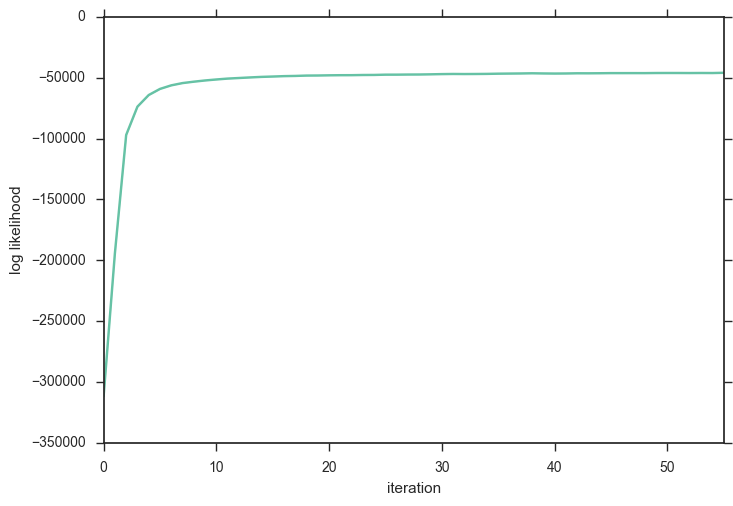

In [307]:
%matplotlib inline
import pandas as pd
trace = pd.read_csv("sampler.log", delimiter="\t", header=None)
trace.columns = ["time", "iter", "ll"]
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
ax = sns.tsplot(trace["ll"])
ax.set(xlabel='iteration', ylabel='log likelihood')

In [308]:
'''
    model_position_df:
        index: irrelevent
        columns:
            legislator: model index of legislator
            vote: model index of vote
            position: 1 if yes, 0 if no

    model_legislator_index:
        index: model index of legislator
        value: index of legislator in legislator_df

    model_vote_index:
        index: model index of vote
        value: index of vote in vote_df
'''
            
model_legislator_index = pd.read_csv("model_legislator_index.df")
model_legislator_index.columns=["legislator", "legislator_df_ix"]
model_vote_index = pd.read_csv("model_vote_index.df")
model_vote_index.columns=["vote", "vote_df_ix"]
legislator_df = pd.read_csv("legislator_df.df")
position_df = pd.read_csv("position_df.df")
vote_df = pd.read_csv("vote_df.df")

In [309]:
'''load up gibbs trace, link to legislator_df and vaidate'''

import glob
import numpy as np
BURNIN = 30
files = glob.glob("trace/leg_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei["iter"] = iter_
            yield tracei

leg_traces = pd.concat(get_trace())
groupby_object = leg_traces.groupby(['legislator'])
leg_means = groupby_object.aggregate(np.mean)

leg_means = leg_means.sort(["theta"], ascending=False)

#print leg_means.head()

def check(ln):
    # 2x checking pandas....
    rr = pd.concat(get_trace())
    rr = rr.query("legislator=={}".format(ln))
    print rr["theta"].mean()

# leg_means['legislator'] = leg_means.index
leg_means.reset_index(inplace=True)
leg_means = leg_means[["legislator", "theta"]]
legislator_df['legislator_df_ix'] = legislator_df.index
legislator_df.head()
leg_means.merge(model_legislator_index, on ="legislator").merge(legislator_df, on="legislator_df_ix")


/Library/Python/2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,legislator,theta,legislator_df_ix,Unnamed: 0,last_name,first_name,birthday,gender,type,state,...,thomas_id,opensecrets_id,lis_id,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,527,1.832567,12267,12267,Lautenberg,Frank,1924-01-23,M,sen,NJ,...,1381.0,N00000659,S166,2515.0,300064,53324.0,NaN,NaN,14914.0,Frank Lautenberg
1,212,1.639412,212,212,Lewis,John,1940-02-21,M,rep,GA,...,688.0,N00002577,NaN,2528.0,400240,26820.0,John Lewis (Georgia),NaN,15431.0,John Lewis (Georgia politician)
2,456,1.624201,457,457,Pocan,Mark,1964-08-14,M,rep,WI,...,2171.0,N00033549,NaN,79688.0,412585,26238.0,Mark Pocan,NaN,21370.0,Mark Pocan
3,311,1.620157,312,312,Schakowsky,Janice,1944-05-26,F,rep,IL,...,1588.0,N00004724,NaN,57874.0,400360,6387.0,Jan Schakowsky,NaN,29911.0,Jan Schakowsky
4,364,1.609771,365,365,Wilson,Frederica,1942-11-05,F,rep,FL,...,2004.0,N00030650,NaN,87016.0,412412,17319.0,Frederica Wilson,NaN,21118.0,Frederica Wilson
5,83,1.605836,83,83,Clarke,Yvette,1964-11-21,F,rep,NY,...,1864.0,N00026961,NaN,1022875.0,412221,44741.0,Yvette D. Clarke,NaN,20733.0,Yvette Clarke
6,209,1.600253,209,209,Lee,Barbara,1946-07-16,F,rep,CA,...,1501.0,N00008046,NaN,54579.0,400237,8315.0,NaN,NaN,29778.0,Barbara Lee
7,398,1.595509,399,399,Lowenthal,Alan,1941-03-08,M,rep,CA,...,2111.0,N00033274,NaN,93815.0,412521,16469.0,Alan Lowenthal,NaN,21313.0,Alan Lowenthal
8,120,1.589041,120,120,Edwards,Donna,1958-06-28,F,rep,MD,...,1894.0,N00028249,NaN,38535.0,412263,65085.0,NaN,NaN,20763.0,Donna Edwards
9,46,1.571266,46,46,Becerra,Xavier,1958-01-26,M,rep,CA,...,70.0,N00009774,NaN,26567.0,400021,26754.0,Xavier Becerra,NaN,29316.0,Xavier Becerra


In [310]:
import glob
BURNIN = 30
files = glob.glob("trace/votes_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei.columns=["ix", "vote", "alpha", "beta"]
            tracei["iter"] = iter_
            yield tracei

votes_trace = pd.concat(get_trace())
votes_trace_groupby_object = votes_trace.groupby(['vote'])
vote_means = votes_trace_groupby_object.aggregate(np.mean)
vote_means.reset_index(inplace=True)
vote_means.head()
vote_df['vote_df_ix'] = vote_df.index
votes_merged = model_vote_index.merge(vote_means, on="vote").merge(vote_df, on="vote_df_ix")
votes_merged.sort("beta")

/Library/Python/2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,vote,vote_df_ix,ix,alpha,beta,Unnamed: 0,amendment_author,amendment_number,amendment_purpose,amendment_type,...,record_modified,requires,result,result_text,session,source_url,subject,type,updated_at,vote_id
730,731,878,731,0.148733,-3.152592,878,NaN,158.0,To prohibit the consideration of a budget reso...,s,...,2013-03-22T11:37:00-04:00,1/2,Amendment Rejected,Amendment Rejected (45-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Ayotte Amdt. No. 158,On the Amendment,2014-06-18T11:22:44-04:00,s50-113.2013
766,767,914,767,-0.086052,-3.131000,914,NaN,526.0,To establish a deficit-neutral reserve fund to...,s,...,2013-03-23T03:41:00-04:00,1/2,Amendment Rejected,Amendment Rejected (44-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Vitter Amdt. No. 526,On the Amendment,2014-06-18T11:22:43-04:00,s83-113.2013
828,829,980,829,0.191560,-3.068008,980,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll142.xml,"Providing for consideration of H.R. 1459, the ...",On Ordering the Previous Question,2014-06-18T11:23:29-04:00,h142-113.2014
512,513,539,513,0.194906,-3.049422,539,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll585.xml,Keep Your Health Plan Act of 2013,On Motion to Table the Appeal of the Ruling of...,2014-06-18T11:20:52-04:00,h585-113.2013
748,749,896,749,-0.204230,-3.041363,896,NaN,307.0,To establish a deficit-neutral reserve fund to...,s,...,2013-03-22T21:25:00-04:00,1/2,Amendment Rejected,Amendment Rejected (46-53),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Thune Amdt. No. 307,On the Amendment,2014-06-18T11:22:43-04:00,s67-113.2013
733,734,881,734,0.319666,-3.040403,881,NaN,222.0,To establish a deficit neutral reserve fund to...,s,...,2013-03-22T12:27:00-04:00,1/2,Amendment Rejected,Amendment Rejected (45-54),2013,http://www.senate.gov/legislative/LIS/roll_cal...,Crapo Amdt. No. 222,On the Amendment,2014-06-18T11:22:44-04:00,s53-113.2013
450,451,475,451,-0.050448,-3.004444,475,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll527.xml,Making continuing appropriations for the Food ...,Table Appeal of the Ruling of the Chair,2014-06-18T11:21:02-04:00,h527-113.2013
1042,1043,1201,1043,0.256204,-3.002128,1201,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll342.xml,"Providing for consideration of H.R. 6, the Dom...",On the Resolution,2014-06-27T13:15:25-04:00,h342-113.2014
437,438,462,438,0.336969,-2.993178,462,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll515.xml,Pay Our Guard and Reserve Act,Table Appeal of the Ruling of the Chair,2014-06-18T11:21:04-04:00,h515-113.2013
1179,1180,1338,1180,-0.087654,-2.989080,1338,NaN,NaN,NaN,NaN,...,NaN,1/2,Passed,Passed,2014,http://clerk.house.gov/evs/2014/roll466.xml,"Providing for consideration of H.Res. 676, pro...",On the Resolution,2014-08-02T15:58:46-04:00,h466-113.2014


In [311]:
#        congress = ln[1]
#        number = int(float(ln[2]))
#        btype = ln[3]
#        ideology = ln[4]
tmp = votes_merged[["session","bill_number", "bill_type", "beta"]]
tmp.to_csv("votes_merged.csv")
# run wtfpandasjoin.py to do the join. i kept trying to do w/ pandas and getting errors/bugs

In [312]:
reuse_df = pd.DataFrame.from_csv("pairs_enhanced_again.txt")
# many, many, many unknowns b.c no votes. research opportunity. ideal point w/o vote. interesting... b/c many
# things are killed in committee. 
criterion = reuse_df['ideology_a'].map(lambda x: x != "unknown") 
reuse_df_no_unk = reuse_df[criterion]

reuse_df_no_unk["diff"] = abs(reuse_df_no_unk["ideology_a"].astype(float) - reuse_df_no_unk["ideology_b"].astype(float))
reuse_df_no_unk["diff"] = reuse_df_no_unk["diff"].astype(float)
t = reuse_df_no_unk.sort("diff", ascending =False)
t.head()

# many, many, many unknowns b.c no votes. research opportunity. ideal point w/o vote. interesting... b/c many
# things are killed in committee. 

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,a_section_guid,bill_no_a,bill_kind_a,congress_a,version_code_a,issued_on_a,bfn,b_section_guid,bill_no_b,bill_kind_b,congress_b,version_code_b,issued_on_b,jac,ideology_a,ideology_b,diff
afn,,,,,,,,,,,,,,,,,
sections/H9245CA942676467E90C86C5665FCEF45_._govtrackdata_bills_hres_hres770_text-versions_eh_document.anno,H9245CA942676467E90C86C5665FCEF45,770,hres,113,eh,2014-12-04,sections/HEDCBC2AABA9149B4B04444DFCA1329CE_._g...,HEDCBC2AABA9149B4B04444DFCA1329CE,3979,hr,113,enr,2014-01-01,1.000000,-2.34314953566,2.2841621082,4.627312
sections/H9245CA942676467E90C86C5665FCEF45_._govtrackdata_bills_hres_hres770_text-versions_eh_document.anno,H9245CA942676467E90C86C5665FCEF45,770,hres,113,eh,2014-12-04,sections/H9E92FBC93D094C4D8A25484ACAA352F2_._g...,H9E92FBC93D094C4D8A25484ACAA352F2,3979,hr,113,eah,2014-12-04,1.000000,-2.34314953566,2.2841621082,4.627312
sections/H2016C5AE9EB74144BF19A64030FB3E45_._govtrackdata_bills_hr_hr4435_text-versions_ih_document.anno,H2016C5AE9EB74144BF19A64030FB3E45,4435,hr,113,ih,2014-04-09,sections/H4CE6A5ECCD304F97A554C14AE0FB7E0C_._g...,H4CE6A5ECCD304F97A554C14AE0FB7E0C,3979,hr,113,eah,2014-12-04,0.952381,-0.744259193539,2.2841621082,3.028421
sections/H1774F0D01D784A6096AA5DE118A1B27C_._govtrackdata_bills_hr_hr4435_text-versions_eh_document.anno,H1774F0D01D784A6096AA5DE118A1B27C,4435,hr,113,eh,2014-05-22,sections/H4C0066ACD78D40D3B32681C93F4ABCD7_._g...,H4C0066ACD78D40D3B32681C93F4ABCD7,3979,hr,113,eah,2014-12-04,0.950820,-0.744259193539,2.2841621082,3.028421
sections/H6ECE88B9E5CA4927B369163A805EE450_._govtrackdata_bills_hr_hr4435_text-versions_rh_document.anno,H6ECE88B9E5CA4927B369163A805EE450,4435,hr,113,rh,2014-05-13,sections/H83137D1CD57749578ABE189A9CED49BC_._g...,H83137D1CD57749578ABE189A9CED49BC,3979,hr,113,enr,2014-01-01,0.882353,-0.744259193539,2.2841621082,3.028421


In [313]:
import pandas as pd
import math
import json
from ulman import get_tokens
reuse_df = pd.DataFrame.from_csv("pairs_enhanced_again.txt")
# many, many, many unknowns b.c no votes. research opportunity. ideal point w/o vote. interesting... b/c many
# things are killed in committee. 
criterion = reuse_df['ideology_a'].map(lambda x: x != "unknown") 
reuse_df_no_unk = reuse_df[criterion]
reuse_df_no_unk["sa"] = reuse_df_no_unk["ideology_a"].astype(float)> 0
reuse_df_no_unk["sb"] = reuse_df_no_unk["ideology_b"].astype(float)> 0
reuse_df_no_unk["diff"] = reuse_df_no_unk["sa"] == reuse_df_no_unk["sb"]
c2 = reuse_df_no_unk["diff"].map(lambda x: x == False) 
reuse_df_no_unk = reuse_df_no_unk[c2]
reuse_df_no_unk.head()
reuse_df_no_unk.reset_index(level=0, inplace=True)

#fn = "sections/H64E2C45242374DC4862B44B5C0F52F81_._govtrackdata_bills_hr_hr4435_text-versions_rh_document.anno"
#fn = "sections/H739EC1B25FAE4AF39C353537EAF842BF_._govtrackdata_bills_hr_hr1960_text-versions_pcs_document.anno"
#with open(fn, "r") as inf:
#    print " ".join(get_tokens(fn))

/Library/Python/2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [314]:
def tokkr(row):
    return get_tokens(row["afn"])

def tokkr2(row):
    return get_tokens(row["bfn"])

reuse_df_no_unk["atxt"] = reuse_df_no_unk.apply(tokkr,axis=1)
reuse_df_no_unk["btxt"] = reuse_df_no_unk.apply(tokkr2,axis=1)

In [317]:
for ix, rwn in reuse_df_no_unk.iterrows():
    print "\n" + " ".join(rwn["atxt"])


1635 Certification nuclear force structureNot later 90 days date enactment Act Chairman Joint Chiefs Staff coordination Commander United States Strategic Command shall certify congressional defense committees plan implementation New START Treaty -LRB- defined section 494 -LRB- -RRB- -LRB- 2 -RRB- -LRB- D -RRB- title 10 United States Code -RRB- announced April 8 2014 will enable United States meet obligations treaty manner ensures nuclear forces United States -LRB- 1 -RRB- capable survivable balanced -LRB- 2 -RRB- maintain strategic stability deterrence extended deterrence allied assurance

612.One-year extension certain bonus special pay authorities health care professionals -LRB- -RRB- Title 10 authoritiesThe following sections title 10 United States Code amended striking December 31 2013 inserting December 31 2014 -LRB- 1 -RRB- Section 2130a -LRB- -RRB- -LRB- 1 -RRB- relating nurse officer candidate accession program -LRB- 2 -RRB- Section 16302 -LRB- d -RRB- relating repayment educa